<h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
<br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
</br>
<h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

</br>
</br>
</br>
</br>
</br>

<h1 style="text-align: center;">Курсовая работа по курсу:</h1>
<h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: right;">Студент: Кумакшев Феликс Владимирович</h5>
<h5 style="text-align: right;">Группа: ТФэ-01-21</h5>

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

<h5 style="text-align: center;">Москва 2024</h5>

## Вариант №6

## $\space$ Дано:
* $P_0 = 25 \space МПа $ - Начальное давление свежего пара 
* $t_0 = 550 ^\circ C$ -  Начальная температура свежего пара
* $P_{пп} = 4 \space МПа$ -  Давление промежуточного перегрева пара
* $t_{пп} = 550 ^\circ C$ -  Температура промежуточного перегрева пара
* $P_{к} = 5 \space кПа$ - Давление в конденсаторе
* $t_{п.в.} = 275^\circ C$ -  Температура питательной воды

* $N_{э} = 330 \space МВт$ -  Номинальная электрическая мощность
* z = 9 -  Количество отборов
* $d_{р.с} = 1.16 \space м$ - Средний диаметр
* $n = 60 $ - Частота вращения
* $H_{0} = 90-120 \space кДж/кг$ -  Теоретический теплоперепад
  

# 1. Построение процесса расширения пара в турбине.        
#  Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [23]:
from iapws_model import IapwsModel
import matplotlib.pyplot as plt
import calculation_G0_Gk_ 
from plot_hs_diagram_ import plot_h_s_diagram 
from iapws import IAPWS97 as gas
import calculation_G0_Gk_ as crs
import numpy as np
from scipy.optimize import fsolve

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
MW = 10 ** 6

In [24]:
electrical_power = 330 * MW # Номинальная электрическая мощность
p_0 = 25 * MPa #Начальное давление свежего пара
t_0 = 550 # Начальная температура свежего пара в градусах Цельсия
p_k = 5 * kPa  # Конечное давление пара p2=pk
z = 9 # Число отборов

p_overheating = 4 * MPa # Давление промежуточного перегрева
t_overheating = 550 # Температура промежуточного перегрева

t_feed_water = 275 # Температура питательной воды в градусах Цельсия
p_feed_water = 1.33 * p_0 # Давление питательной воды

internal_efficiency = 0.85 #Внутренний КПД
mechanical_efficiency = 0.994 # Механический КПД
generator_efficiency = 0.99 # КПД электрогенератора

delta_p_0 = 0.05 * p_0
delta_p_overheating = 0.1 * p_overheating
delta_p_1 = 0.03 * p_overheating


In [25]:
inlet_mass_flow, condenser_mass_flow = calculation_G0_Gk_.calculate_inout_mass_flow_rate(
    p_0,
    t_0,
    p_overheating,
    t_overheating,
    p_feed_water, 
    t_feed_water, 
    p_k, 
    electrical_power,
    internal_efficiency, 
    mechanical_efficiency, 
    generator_efficiency, 
    delta_p_0, 
    delta_p_overheating, 
    delta_p_1
)

In [26]:
print(f"Массовый расход в турбину на входе: {round(inlet_mass_flow,3)}, кг/с")
print(f"Массовый расход в конденсатор: {round(condenser_mass_flow, 3)}, кг/с")

Массовый расход в турбину на входе: 268.96, кг/с
Массовый расход в конденсатор: 177.333, кг/с


In [27]:
( 
    _point_0,
    point_0, 
    point_1t, 
    hp_heat_drop, 
    point_1, 
    _point_overheating, 
    point_overheating,
    point_2t,
    lp_heat_drop, 
    point_2, 
    point_k_water, 
    point_feed_water,
    _Point_0, 
    Point_0,
) = calculation_G0_Gk_.get_points_for_params(
    p_0,
    t_0,
    delta_p_0,
    p_overheating,
    t_overheating,
    delta_p_overheating,
    delta_p_1,
    p_k,
    p_feed_water,
    t_feed_water,
    internal_efficiency
)

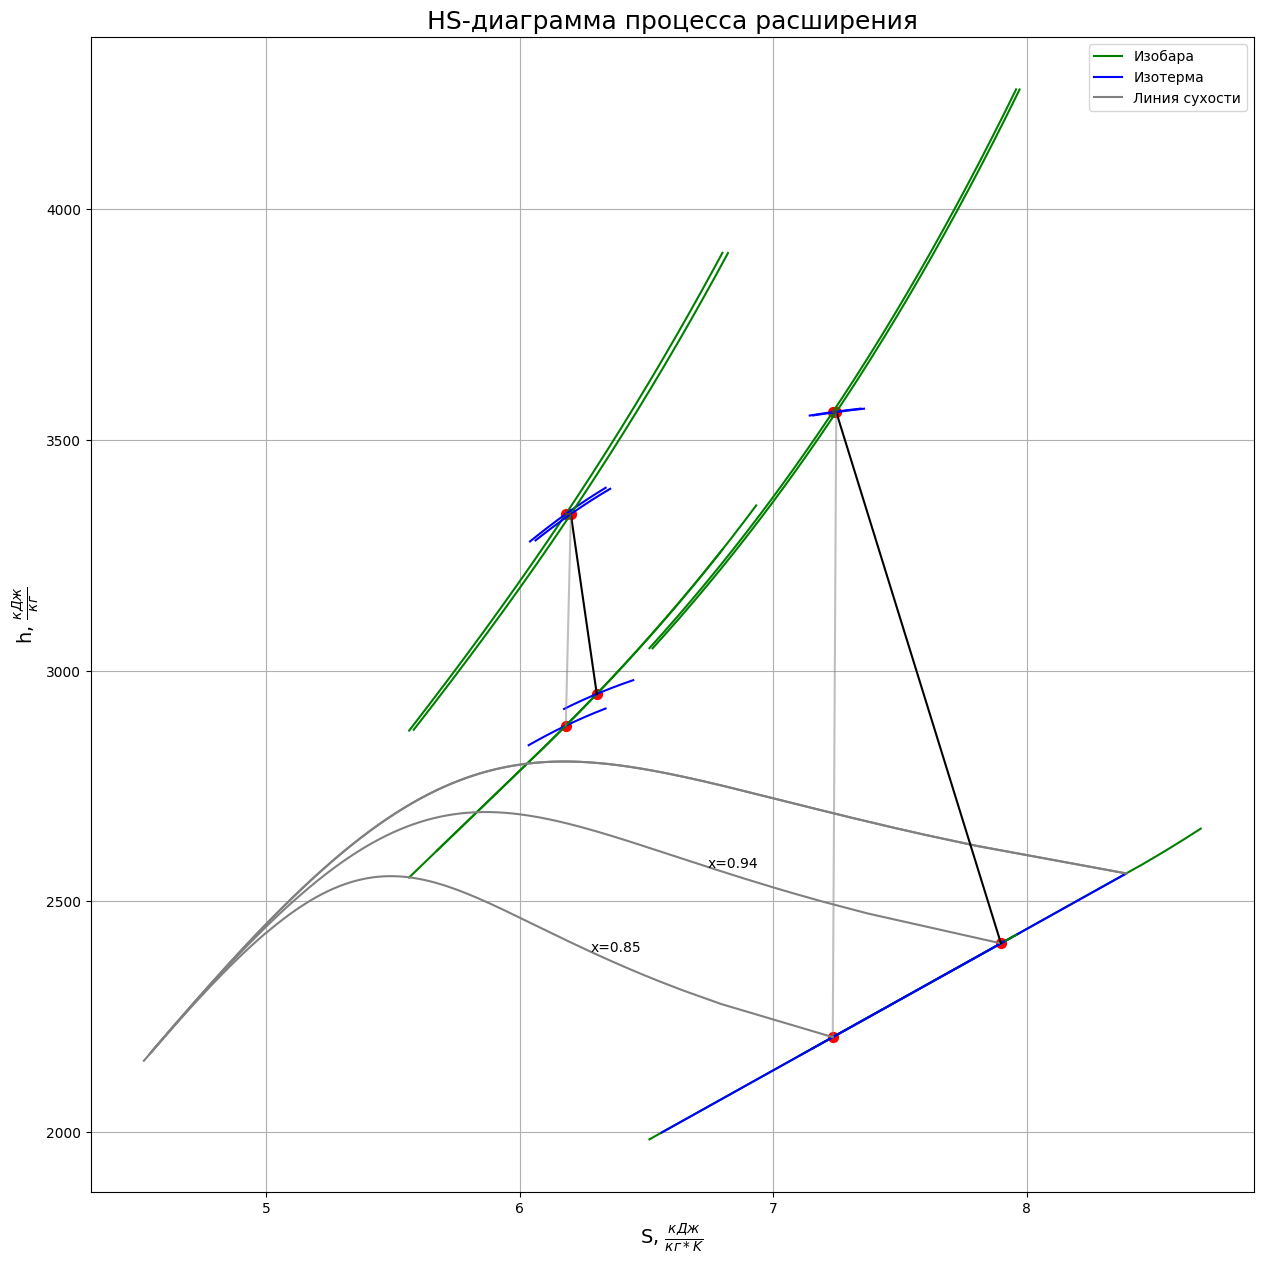

In [6]:
h_s_diagram_of_the_expansion_process = plot_h_s_diagram(
    _point_0,
    point_0, 
    point_1t,
    point_1,
    _point_overheating,
    point_overheating, 
    point_2,
    point_2t
  )

# 2. Проведение расчета регулирующей ступени и определение зависимости $η_{ол}$ от $U/c_{ф}$.
## Обоснованно выбрать вариант исполнения регулирующей ступени для проектирования ЦВД в рамках заданного диапазона.
 

In [28]:
n = 60 # Частота вращения
D_average = 1.16 # Средний диаметр
degree_of_reaction = 0.08 # Степень реактивности
theoretical_heat_drop = np.linspace(90, 120) # Теоретический теплоперепад

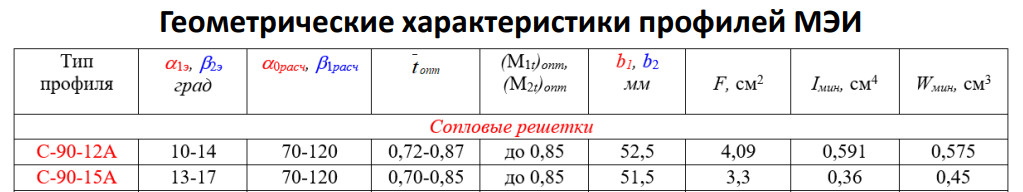

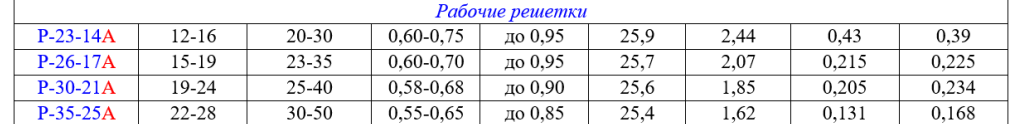

## Сопловая решетка C-90-15А

In [29]:
alpha_1_eff = 16 # Эффективный угол сопловой решетки
b_1 = 0.05146 # Хорда сополовой решетки
t_1opt_ = 0.75 # Относительный шаг по атласу

### Суммарные потери в сопловой решетке  С-90-25А

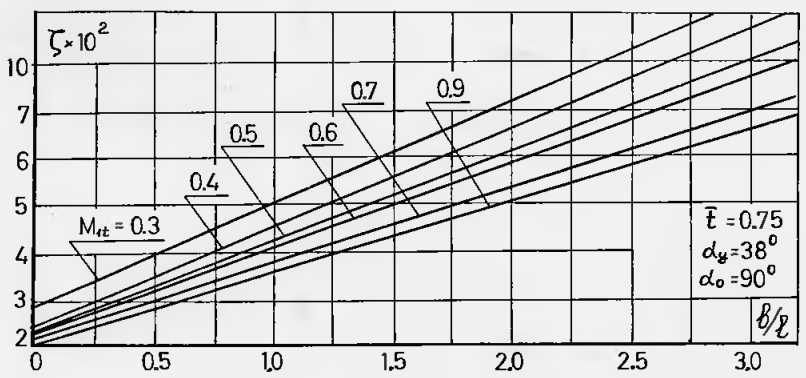

## Рабочая решетка Р-35-25А

In [30]:
b_2_atl= 0.02541 # Длина хорды рабочей решетки по атласу
b_2 = 0.04 # Принятое значение длины хорды рабочей решетки
W_min_atl = 0.45 * 10 ** (-6) # Минимальный момент сопротивления в рабочей решетке по атласу

### Суммарные потери в рабочей решетке Р-35-25А

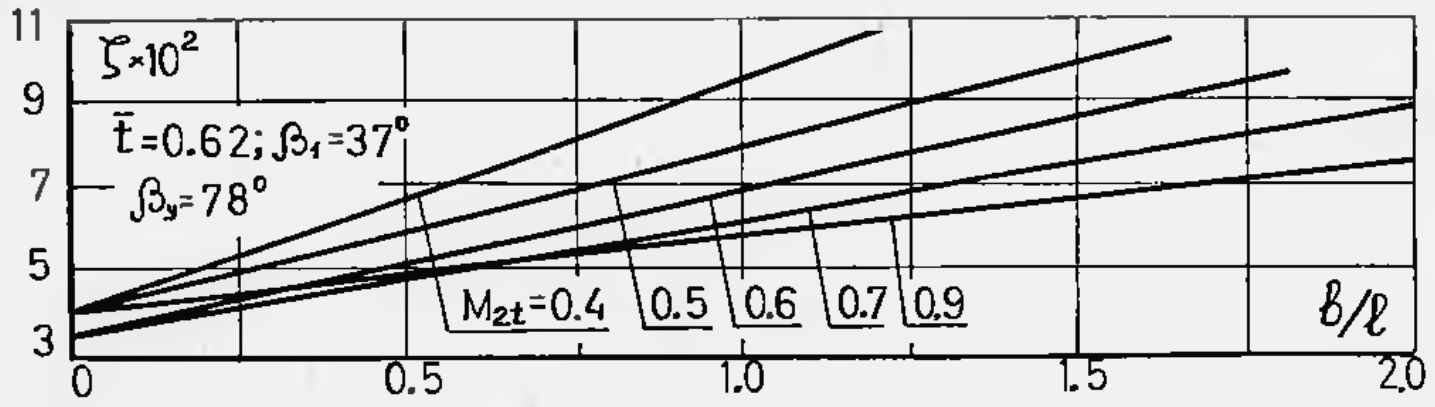

## Определение оптимального значения теоретического теплоперепада по графику зависимости $η_{ол}$ от $H_{0}$

In [31]:
blade_efficiency = []
for h in np.array(theoretical_heat_drop):
    blade_eff = crs.get_blade_efficiency(
        H_0 = h,
        D_average = D_average,
        degree_of_reaction = degree_of_reaction,
        b_1 = b_1,
        b_2 = b_2,
        p_0 = p_0,
        t_0 = t_0,
        delta_p_0 = delta_p_0,
        p_overheating = p_overheating,
        t_overheating = t_overheating,
        delta_p_overheating = delta_p_overheating,
        delta_p_1 = delta_p_1,
        p_k = p_k,
        electrical_power = electrical_power,
        mechanical_efficiency = mechanical_efficiency,
        generator_efficiency = generator_efficiency,
        p_feed_water = p_feed_water,
        t_feed_water = t_feed_water,
        internal_efficiency=internal_efficiency
        
     )
    blade_efficiency.append(blade_eff)
blade_efficiency = np.array(blade_efficiency)


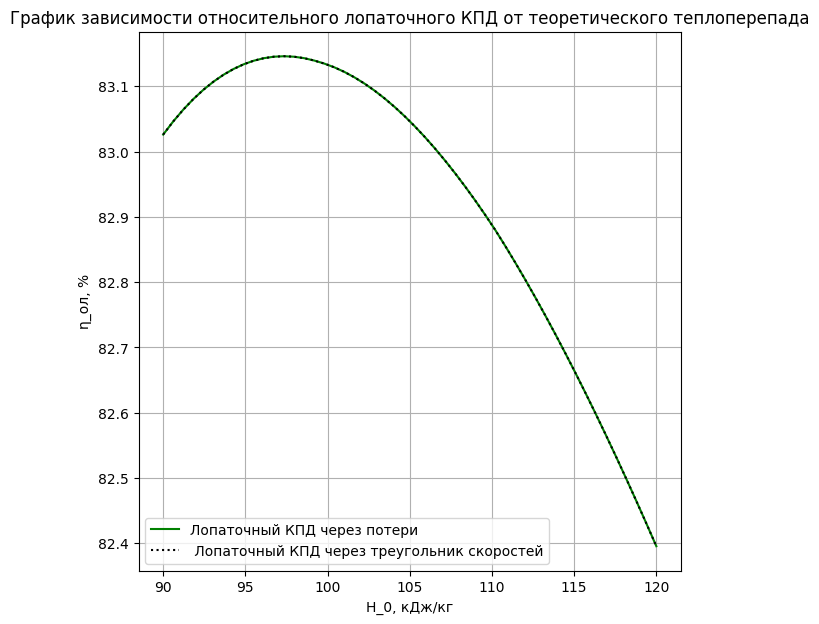

In [32]:
plot_for_find_opt_heat_drop = crs.plot_blade_efficiency_of_heat_drop(
    H_0 = theoretical_heat_drop,
    blade_eff = blade_efficiency[:,0],
    blade_eff_triangle = blade_efficiency[:,1]
)

In [33]:
opt_theoretical_heat_drop = theoretical_heat_drop[np.argmax(blade_efficiency[:,0])]
print(f"Оптимальное значение теоретического теплоперепада: {round(opt_theoretical_heat_drop, 3)}, кДж/кг")

Оптимальное значение теоретического теплоперепада: 97.347, кДж/кг


## Относительный лопаточный КПД при оптимальном значении теоретического теплоперепада

In [34]:
_,opt_blade_efficiency = crs.get_blade_efficiency(
        H_0 = opt_theoretical_heat_drop,
        D_average = D_average,
        degree_of_reaction = degree_of_reaction,
        b_1 = b_1,
        b_2 = b_2,
        p_0 = p_0,
        t_0 = t_0,
        delta_p_0 = delta_p_0,
        p_overheating = p_overheating,
        t_overheating = t_overheating,
        delta_p_overheating = delta_p_overheating,
        delta_p_1 = delta_p_1,
        p_k = p_k,
        electrical_power = electrical_power,
        mechanical_efficiency = mechanical_efficiency,
        generator_efficiency = generator_efficiency,
        p_feed_water = p_feed_water,
        t_feed_water = t_feed_water,
        internal_efficiency=internal_efficiency
)
print(f"Относительный лопаточный КПД: {round(opt_blade_efficiency * 100, 3)} %")      

Относительный лопаточный КПД: 83.146 %


## Построение треугольника скоростей

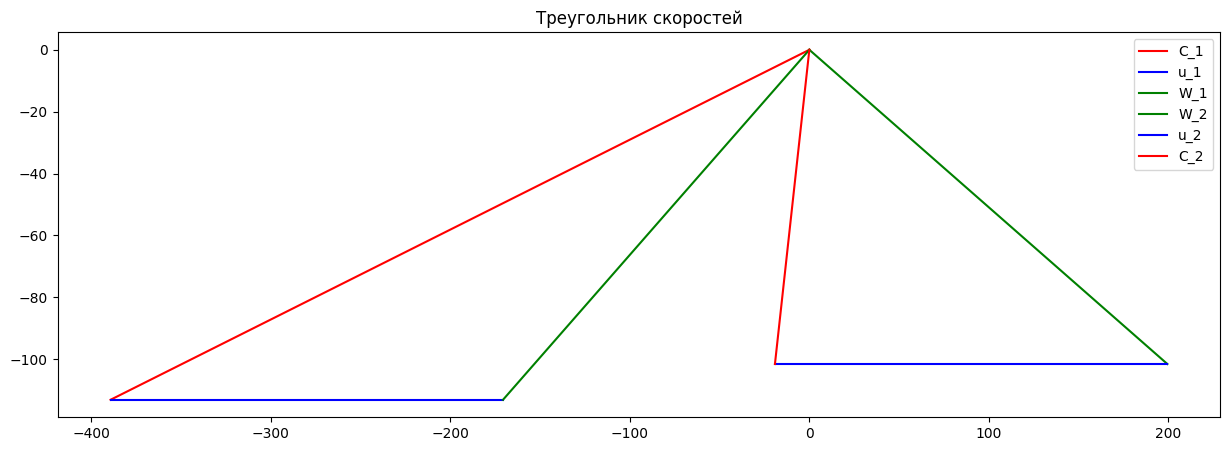

In [35]:
plot_triangle = crs.plot_triangles(
    H_0 = opt_theoretical_heat_drop,
    D_average = D_average,
    degree_of_reaction = degree_of_reaction,
    b_1 = b_1,
    b_2 = b_2,
    p_0 = p_0,
    t_0 = t_0,
    delta_p_0 = delta_p_0,
    p_overheating = p_overheating,
    t_overheating = t_overheating,
    delta_p_overheating = delta_p_overheating,
    delta_p_1 = delta_p_1,
    p_k = p_k,
    electrical_power = electrical_power,
    mechanical_efficiency = mechanical_efficiency,
    generator_efficiency = generator_efficiency,
    p_feed_water = p_feed_water,
    t_feed_water = t_feed_water,
    internal_efficiency=internal_efficiency
)


In [36]:
crs.table_triangles(
    H_0 = opt_theoretical_heat_drop,
    D_average = D_average,
    degree_of_reaction = degree_of_reaction,
    b_1 = b_1,
    b_2 = b_2,
    p_0 = p_0,
    t_0 = t_0,
    delta_p_0 = delta_p_0,
    p_overheating = p_overheating,
    t_overheating = t_overheating,
    delta_p_overheating = delta_p_overheating,
    delta_p_1 = delta_p_1,
    p_k = p_k,
    electrical_power = electrical_power,
    mechanical_efficiency = mechanical_efficiency,
    generator_efficiency = generator_efficiency,
    p_feed_water = p_feed_water,
    t_feed_water = t_feed_water,
    internal_efficiency=internal_efficiency
)


,Абсолютная скорость,Абсолютный угол,Относительная скорость,Относительный угол
Треугольник скоростей,,,,
На входе,405.442326,16.201057,204.769521,33.534270
На выходе,103.357942,100.688037,223.852754,26.982139


## Построение графика зависимости $η_{ол}$ от $U/c_{ф}$

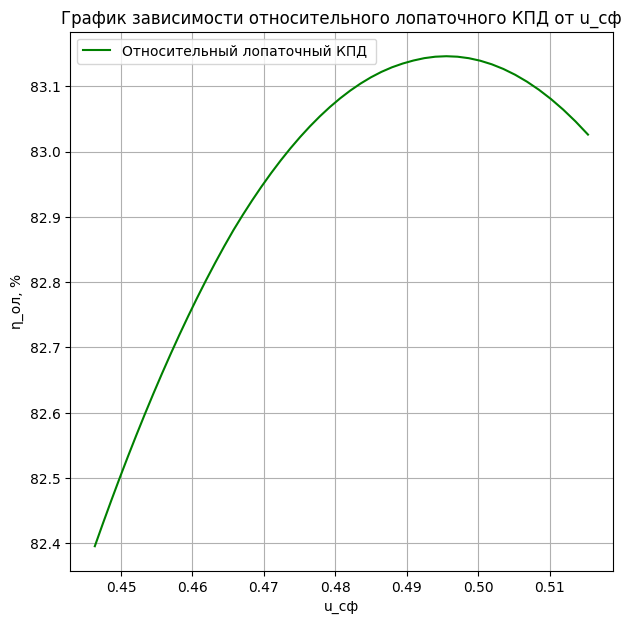

In [37]:
plot_blade_eff_of_u_cf = crs.plot_blade_efficiency_of_u_cf(
    H_0 = theoretical_heat_drop,
    blade_eff =  blade_efficiency[:,0],
    D_average = D_average
)

## Определение внутреннего КПД и внутренней мощности

In [38]:
(
    internal_heat_drop,
    stage_internal_efficiency,
    N_i,
    z_2,
    e,
    l_2,
    losses,
    h_2t,
    rotor_loss,
    delta_H_outlet_speed,
    point_2_t,
    fi,
    psi_
)= crs.get_internal_params(
    H_0 = opt_theoretical_heat_drop,
    D_average = D_average,
    degree_of_reaction = degree_of_reaction,
    b_1 = b_1,
    b_2 = b_2,
    p_0 = p_0,
    t_0 = t_0,
    delta_p_0 = delta_p_0,
    p_overheating = p_overheating,
    t_overheating = t_overheating,
    delta_p_overheating = delta_p_overheating,
    delta_p_1 = delta_p_1,
    p_k = p_k,
    electrical_power = electrical_power,
    mechanical_efficiency = mechanical_efficiency,
    generator_efficiency = generator_efficiency,
    p_feed_water = p_feed_water,
    t_feed_water = t_feed_water,
    internal_efficiency=internal_efficiency
)    

In [39]:
print(f"Внутренний КПД: {round(stage_internal_efficiency * 100, 3)} %")
print(f"Внутренняя мощность: {round(N_i / 1e3, 3)} МВт ")
print(internal_heat_drop)

Внутренний КПД: 75.444 %
Внутренняя мощность: 14.903 МВт 
73.44247562087348


## Потери в сопловой и рабочей решетке

In [40]:
crs.table_of_loss( 
    fi = fi,
    psi_ = psi_,
    delta_H_outlet_speed = delta_H_outlet_speed
)

    

,Коэффициент скорости в сопловой решетке,Коэффициент скорости в рабочей решетке,Потери с выходной скоростью
0,0.957986,0.933481,5341.432063


## Процесс расширения в регулирующей ступени

In [41]:
(
    point_1_,
    point_1t_,
    point_2_t,
    point_2_
) = crs.get_points_for_h_s_diagram(
    H_0 = opt_theoretical_heat_drop,
    D_average = D_average,
    degree_of_reaction = degree_of_reaction,
    b_1 = b_1,
    b_2 = b_2,
    p_0 = p_0,
    t_0 = t_0,
    delta_p_0 = delta_p_0,
    p_overheating = p_overheating,
    t_overheating = t_overheating,
    delta_p_overheating = delta_p_overheating,
    delta_p_1 = delta_p_1,
    p_k = p_k,
    electrical_power = electrical_power,
    mechanical_efficiency = mechanical_efficiency,
    generator_efficiency = generator_efficiency,
    p_feed_water = p_feed_water,
    t_feed_water = t_feed_water,
    internal_efficiency = internal_efficiency,
    losses = losses
)

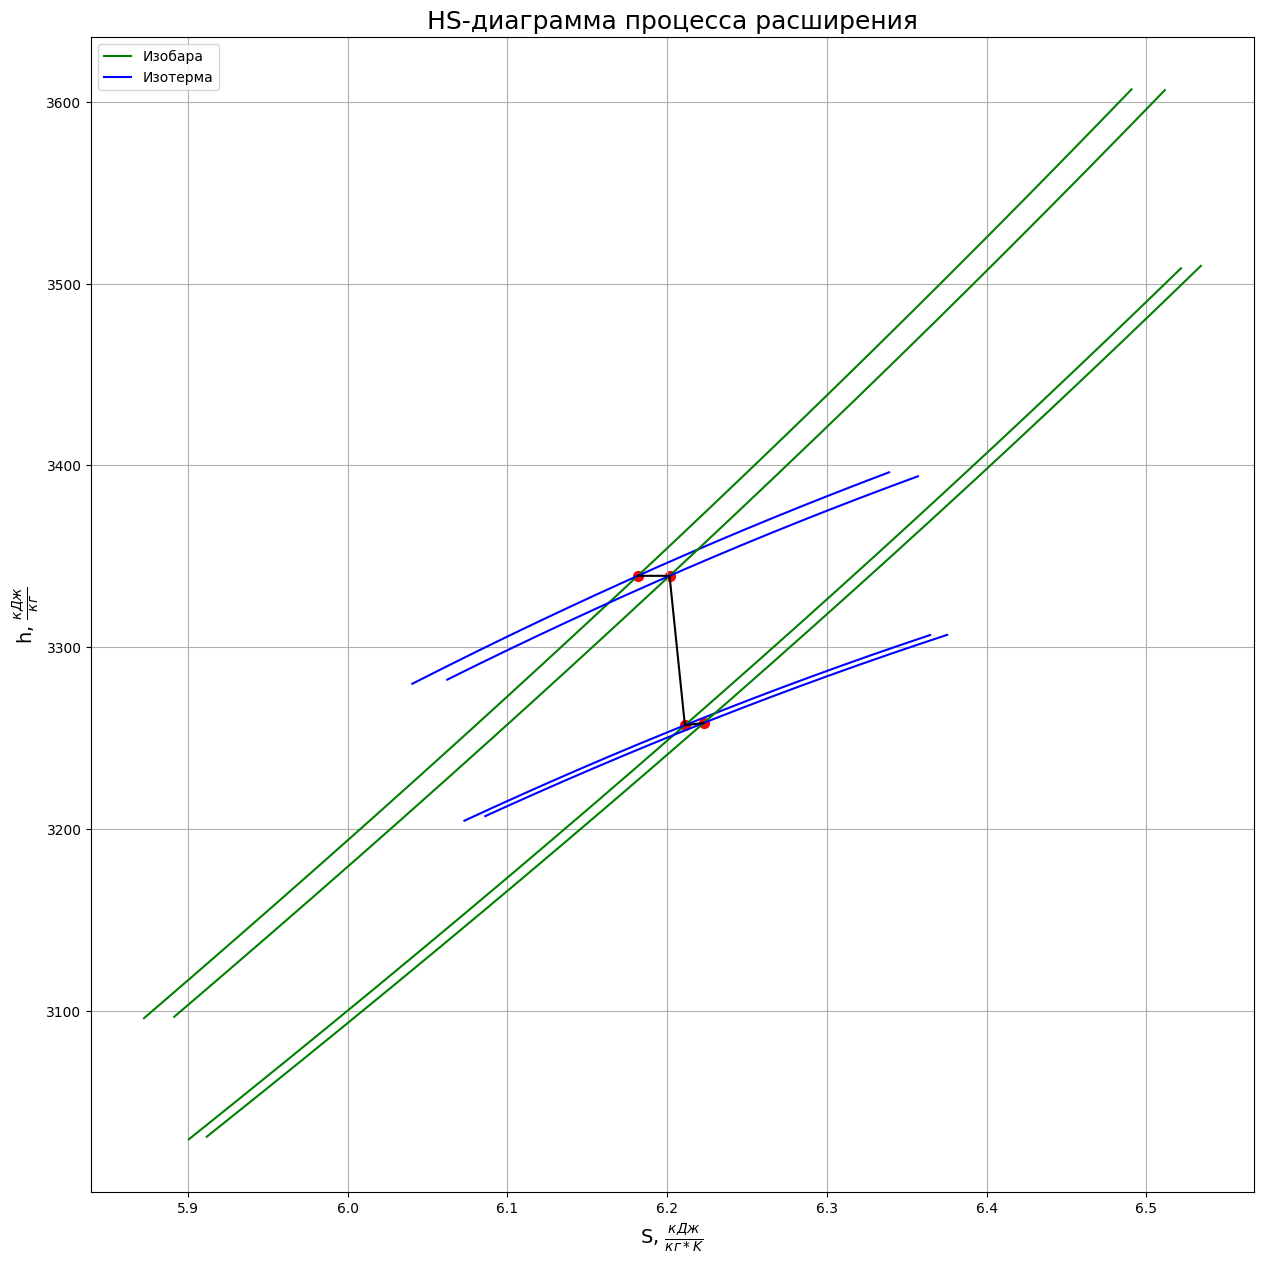

In [42]:
h_s_diagram_regular_stage = crs.plot_h_s_diagram_expansion(
    _Point_0,
    Point_0,
    point_1_,
    point_1t_,
    point_2_,
    point_2_t,
    left_p = 0.95,
    right_p = 1.05
    
)


In [43]:
table_of_point_reg_stage = crs.table_of_points(
    Point_0,
    _Point_0,
    point_1_,
    point_1t_,
    point_2_,
    point_2_t
)
table_of_point_reg_stage

,"Давление P, МПа","Температура T, К","Удельный объем v, м^3/кг","Энтальпия h, кДж/кг","Энтропия s, кДж/(кг*K)"
Точка,,,,,
0',25.000000,823.150000,0.012735,3339.284239,6.181648
0,23.750000,818.590099,0.013404,3339.284239,6.201541
1t,17.757725,765.680902,0.016782,3249.725055,6.201541
1,17.757725,768.022014,0.016878,3257.092499,6.211149
2t,17.300929,763.423595,0.017222,3249.304744,6.211149
2,17.300929,766.319647,0.017343,3258.351680,6.222977


## Прочностный расчет

In [44]:
bending_stress, extension_stress = crs.stress_of_rotor_blade(
    inlet_mass_flow = inlet_mass_flow,
    H_0 = opt_theoretical_heat_drop,
    blade_efficiency = np.max(blade_efficiency[:,0]),
    l_2 = l_2,
    b_2 = b_2,
    e_opt = e,
    D_average = D_average,
    W_min_atl = W_min_atl,
    b_2_atl = b_2_atl,
    z_2 = z_2
)

In [45]:
e

0.5231082751360292

In [46]:
print("Изгибающие напряжения в рабочей лопатке", round(bending_stress, 4),"MPa",  "< [bending_stress] = 20 MPa")
print("Напряжения растяжения в корневом сечении рабочей лопатки", round(extension_stress, 4),"MPa", "< [extension_stress] = 450 MPa")

Изгибающие напряжения в рабочей лопатке 7.8131 MPa < [bending_stress] = 20 MPa
Напряжения растяжения в корневом сечении рабочей лопатки 15.3824 MPa < [extension_stress] = 450 MPa


# 3. Определение числа ступеней и распределение параметров по ним

In [47]:
n_stages = 6 # Число ступеней
delta_diam = 0.2 # Разница между средним диаметром регулирующей ступени и диаметром первой нерегулирующей ступени
speed_coefficient = 0.93 # Коэффициент скорости
root_reaction_degree = 0.05 # Корневая степень реактивности
discharge_coefficient = 0.96 # Коэффициент расхода
overlapping = 0.003 # Перекрыша
veernost_1 = 37 # Веерность
alpha_1_rad = np.deg2rad(15)

In [48]:
(   x,
    diameters,
    veernosts,
    blade_lengths,
    u_cf,
    reaction_degrees,
    new_actual_heat_drop
) = crs.split_over_stages(
    D_average, 
    delta_diam,
    h_2t,
    rotor_loss,
    delta_H_outlet_speed,
    losses,
    point_2_t,
    p_overheating,
    internal_efficiency, 
    veernost_1,
    inlet_mass_flow,
    discharge_coefficient,
    alpha_1_rad,
    point_2,
    n_stages,
    root_reaction_degree
)

Полученное значение числа ступеней: 5.783873447412094, Заданное число ступеней: 6


## Разбивка по ступеням 

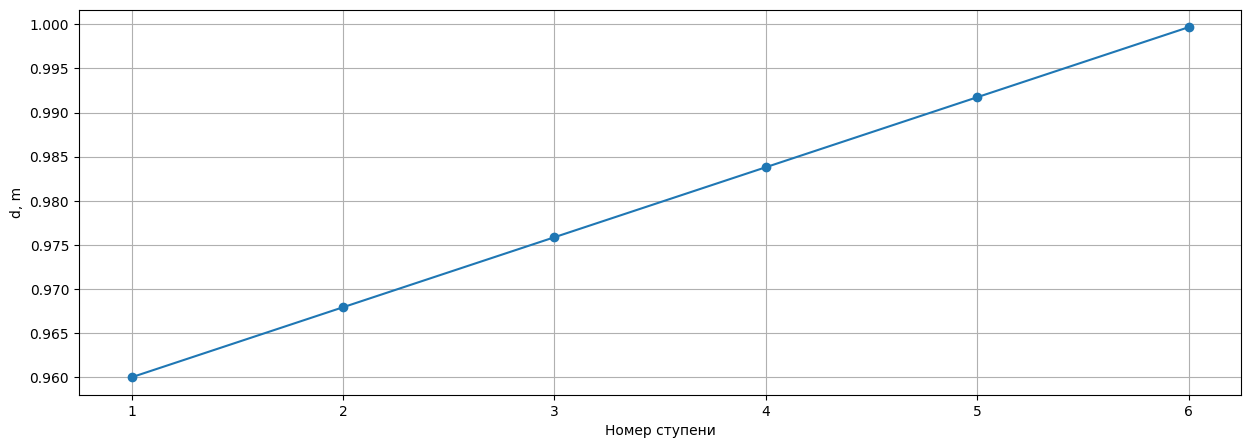

In [49]:
crs.plot_distribution(diameters,"d, m")

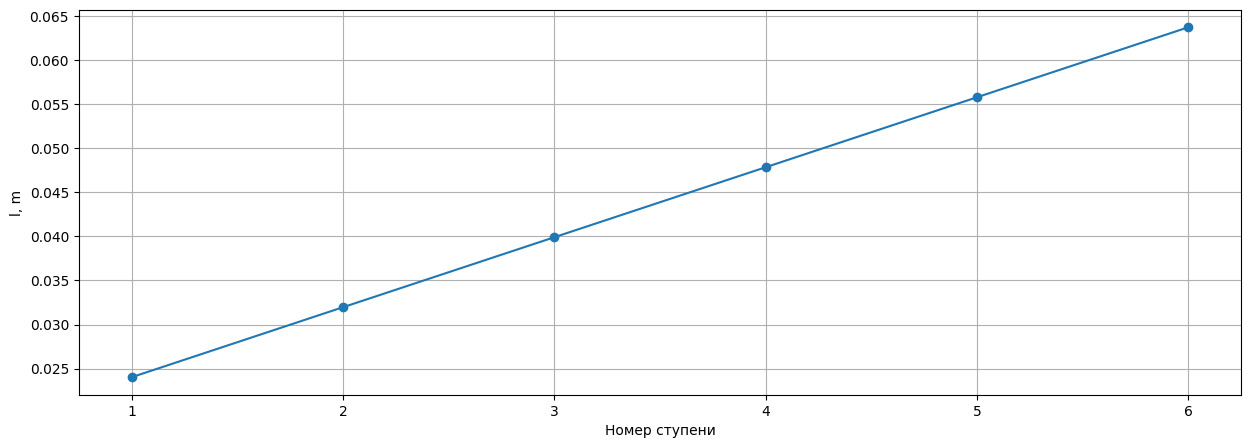

In [50]:
crs.plot_distribution(blade_lengths,"l, m")

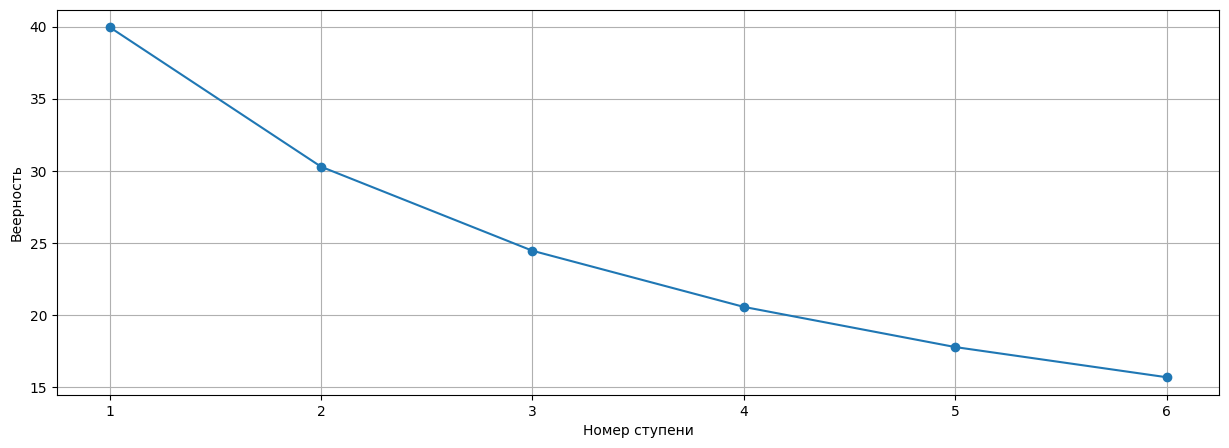

In [51]:
crs.plot_distribution(veernosts, "Веерность")

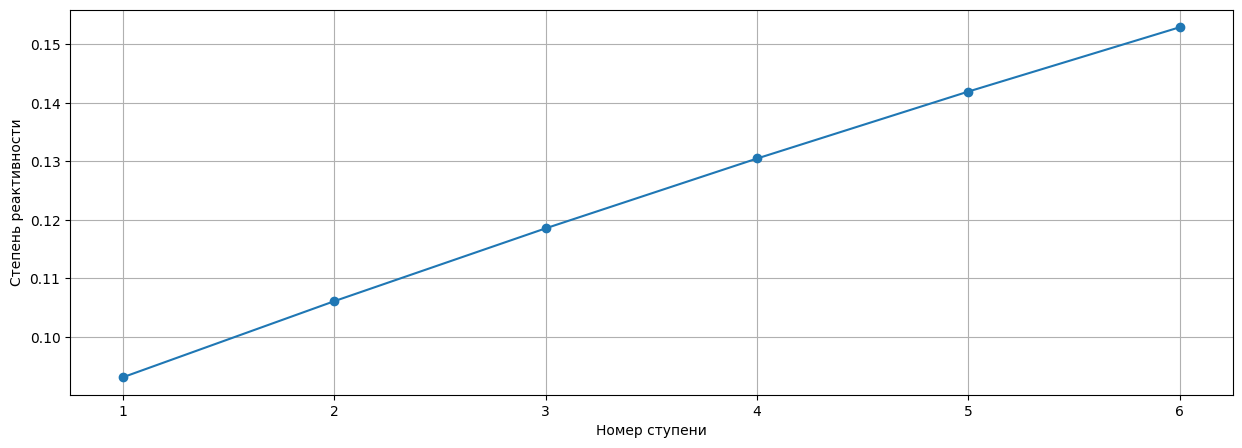

In [52]:
crs.plot_distribution(reaction_degrees, "Степень реактивности")

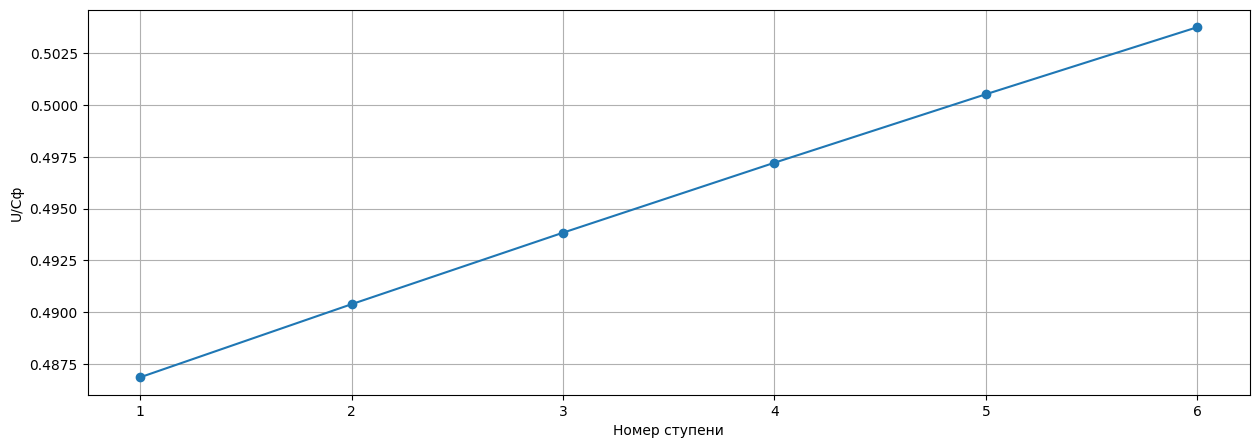

In [53]:

crs.plot_distribution(u_cf, "U/Cф")

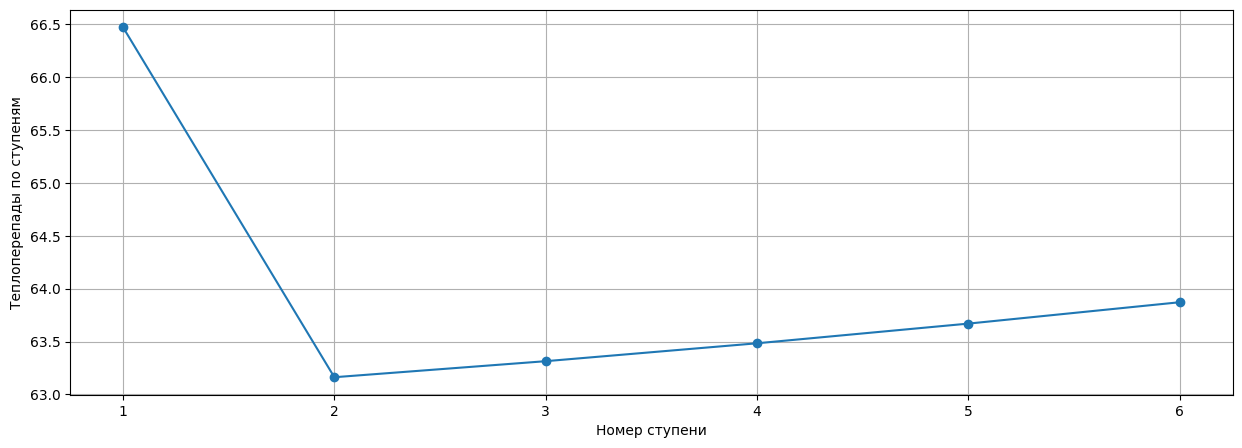

In [54]:

crs.plot_distribution(new_actual_heat_drop, "Теплоперепады по ступеням")